In [2]:
#Building a predictive House price model using machine learning algorithm .
#Analytical tasks:
#1. Data preprocessing : Fill the missing values with the mean of the respective column.
#2. Feature Enginering 
#3. Encoding categorical data
#4. Feature scaling (Standardization)
#5. Model Building using Linear and random forest regression
#6. Hayperparameter Tuning using Gridsearch cross validation

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('classic')

In [5]:
#Sample data sets
housing=pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# Handle missing values :Fill the missing values with the mean of the respective column.

In [9]:
#displaying dataframe wiith having null valueof total_bedrooms
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


In [10]:
housing['total_bedrooms'].dtype

dtype('float64')

In [11]:
#Filling null values with mean value.
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(),inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [12]:
#Checking the null values
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [10]:
#Total instance of data
housing.shape

(20640, 10)

In [13]:
#Checking duplicate records
housing.duplicated().value_counts()

False    20640
dtype: int64

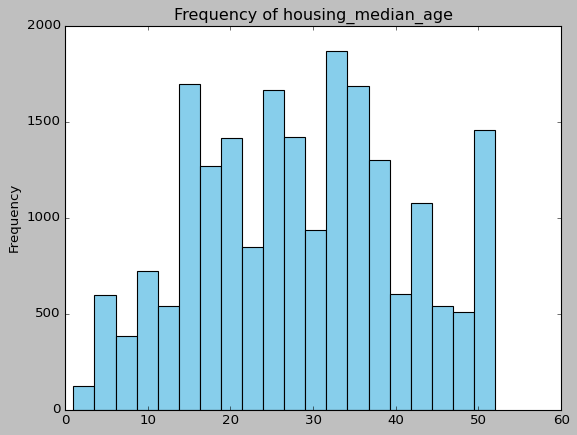

In [27]:
#Checking the distirbution of data for some features 
housing['housing_median_age'].plot(kind='hist',bins=20,color='skyblue',title="Frequency of housing_median_age")
plt.show()

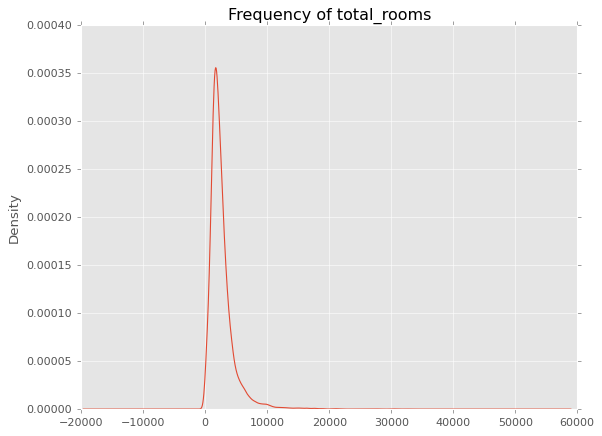

In [29]:
plt.style.use('ggplot')
housing['total_rooms'].plot(kind='kde',title="Frequency of total_rooms")
plt.show()

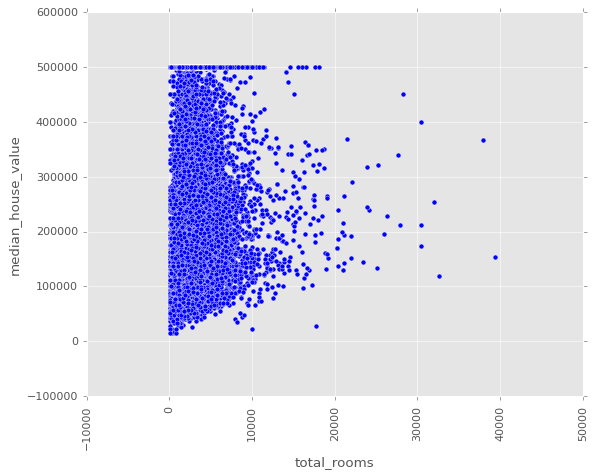

In [32]:
#Feature relationship using scatter plotting
sn.scatterplot(x='total_rooms',y='median_house_value',data=housing)
plt.xticks(rotation=90)
plt.show()

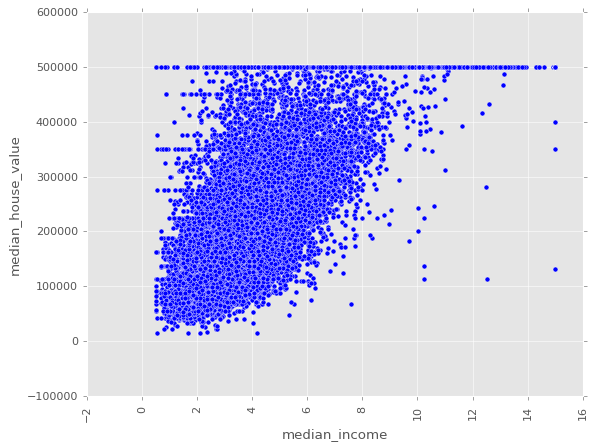

In [33]:
sn.scatterplot(x='median_income',y='median_house_value',data=housing)
plt.xticks(rotation=90)
plt.show()

In [34]:
#Encode categorical data : Convert categorical column in the dataset to numerical data.
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [35]:
#Getting dummies values for catagorical data to get dummies numerical value
housing['ocean_proximity']=housing['ocean_proximity'].astype('category').cat.codes
housing['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [36]:
#Splitting the Dataset (80 to 20)
#Dependant variable
y = housing['median_house_value']
#Independant variables
x = housing.drop(['median_house_value'], axis=1)
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (20640, 9)
Shape of y: (20640,)


In [37]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (16512, 9)
The Shape Of x test: (4128, 9)
The Shape Of y train: (16512,)
The Shape Of y test: (4128,)


In [39]:
train_data=x_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12069,-117.55,33.83,6,502,76.0,228,65,4.2386,1,500001
15925,-122.44,37.73,52,2381,492.0,1485,447,4.3898,3,270000
11162,-118.00,33.83,26,1718,385.0,1022,368,3.9333,0,196100
4904,-118.26,34.01,38,697,208.0,749,206,1.4653,0,118800
4683,-118.36,34.08,52,2373,601.0,1135,576,3.1765,0,225000


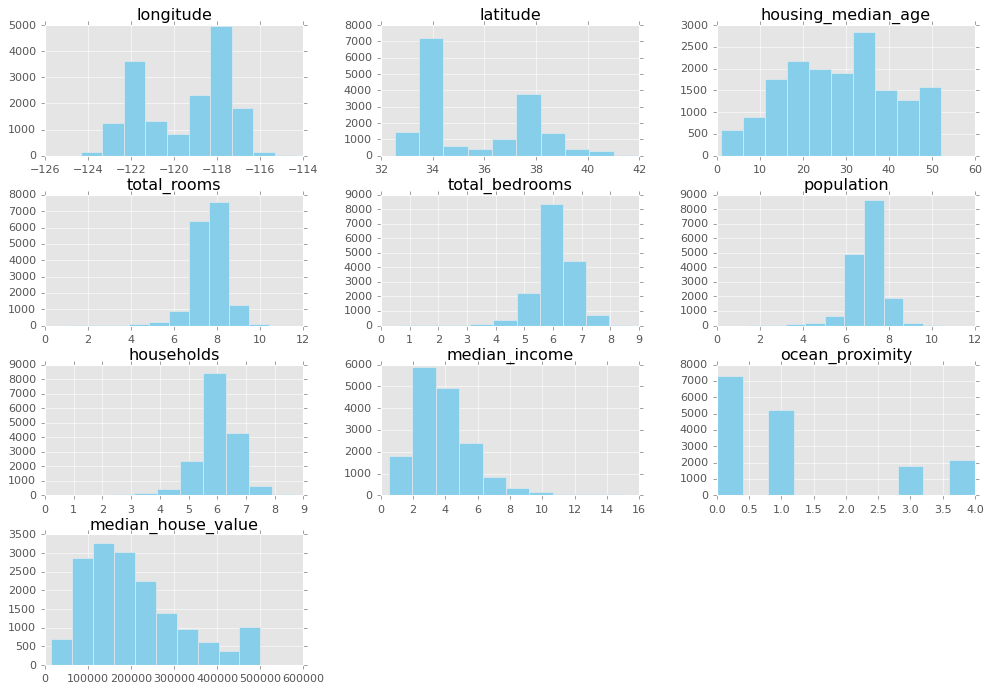

In [48]:
train_data.hist(figsize=(15,10),color='skyblue')
plt.show()

In [44]:
#The distirbution is not skeweed well so that
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

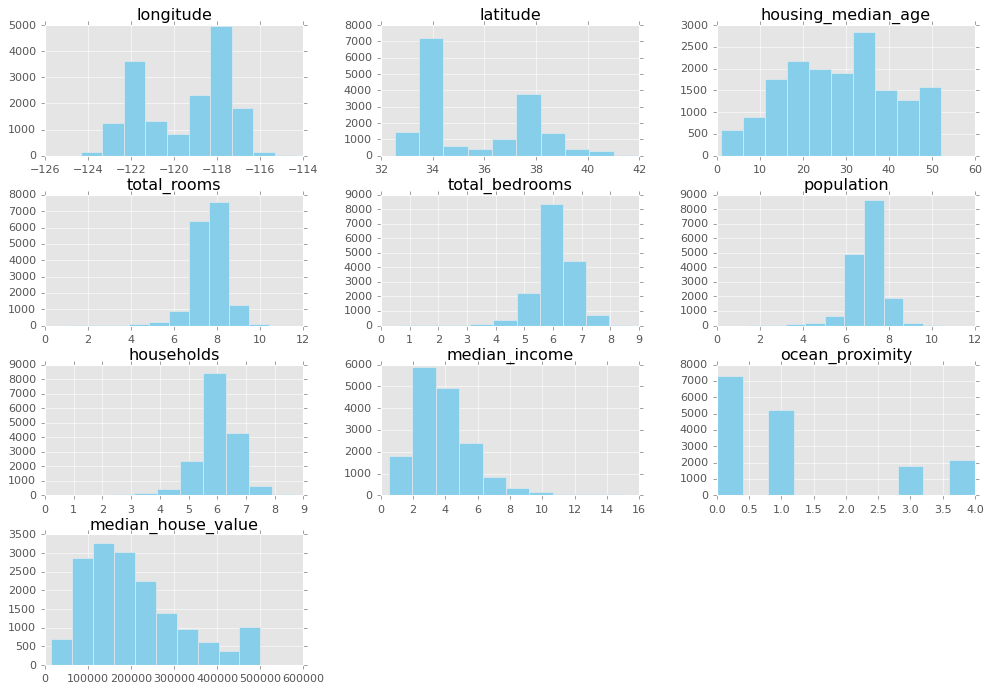

In [49]:
train_data.hist(figsize=(15,10),color='skyblue')
plt.show()

<Axes: >

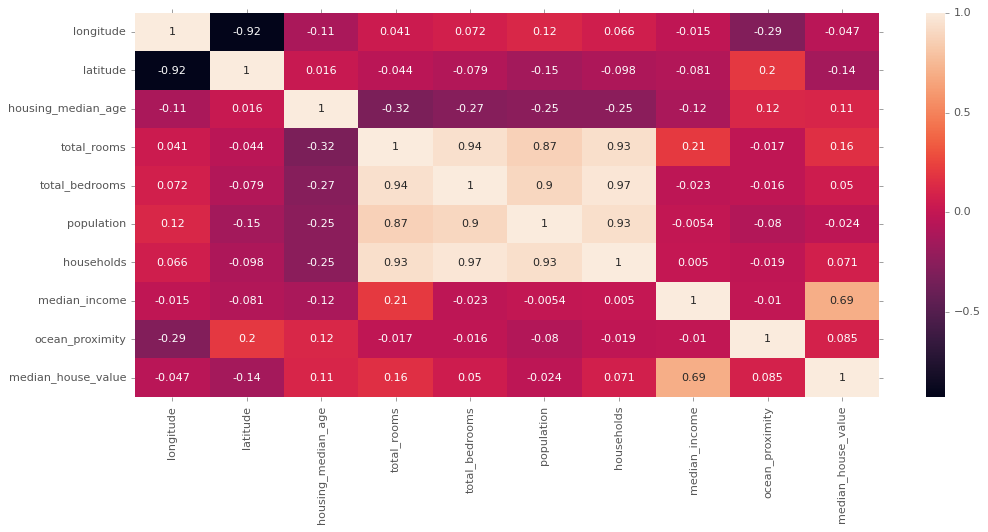

In [50]:
plt.figure(figsize=(15,6))
sn.heatmap(train_data.corr(),annot=True)

In [51]:
#Feature enginering 
train_data['bed_room_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

In [52]:
#Model Building
from sklearn.linear_model import LinearRegression
#Independant variables
x_train,y_train= train_data.drop(['median_house_value'], axis=1),train_data['median_house_value']
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [53]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data['bed_room_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [54]:
x_test,y_test= test_data.drop(['median_house_value'], axis=1),test_data['median_house_value']

In [55]:
#Evaluating the model
reg.score(x_test,y_test)

0.652545603533562

In [56]:
#Feature Scaling: Standardize training and test datasets.
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_s=scalar.fit_transform(x_train)
x_test_s=scalar.fit_transform(x_test)
reg.fit(x_train_s,y_train)

LinearRegression()

In [57]:
#After scaling accuracy
reg.score(x_test_s,y_test)
#I've got almost the same value

0.6526505657168675

In [58]:
#Model building using Random forest
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
#Evaluating the model
forest.score(x_test,y_test)

0.8146746229022239

In [61]:
#performance of Random forest after scaling
forest=RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [62]:
#Unfortunately , the standardaized  value is less than the normal one
forest.score(x_test_s,y_test)

0.7557852960043607

In [94]:
#Hyperparameter tuning : (ideal/optimal searching of parameters )
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
param_grid={ "n_estimators":[3,10,40],
            "max_depth":[None,15]
}
grid_search=GridSearchCV(forest,param_grid,cv=10 ,return_train_score=True)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 15], 'n_estimators': [3, 10, 40]},
             return_train_score=True)

In [95]:
#Optiamal Parametor or model
optimal_score_result=grid_search.best_estimator_

In [96]:
optimal_score_result.score(x_test,y_test)

0.8155378125619676

In [104]:
#sample_Comparisions 
y_pred = optimal_score_result.predict(x_test)
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.reset_index().head(15)

,index,Actual,Predicted
0,14740,136900,142505.000
1,10101,241300,243177.500
2,20566,200700,141945.000
3,2670,72500,84980.000
4,15709,460000,336790.200
5,439,120000,118247.500
6,845,247000,241530.000
7,3768,336900,380152.525
8,964,339700,304395.000
9,8681,265600,222995.000


In [98]:
#Evaluation: Mean squared error
y_pred = optimal_score_result.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2405303736.0152965

In [99]:
# root mean squared error
mean_squared_error(y_test, y_pred, squared = False)

49043.89601179026

In [100]:
#  mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

32456.8749818314

In [101]:
# R squared scored
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
#The score is 0.81 which is closer to 1, indicating that our model works as expected.

0.8155378125619676

In [103]:
prediction_using_random_forest_regression = optimal_score_result.predict((np.array([[-12,50,5,10,10,7,11,3,3,120000,2]])))
f"The price of the house using Random_forest_regression is:{prediction_using_random_forest_regression}"

C:\Users\anduamlak.yitayeh.ETHIO.000\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


'The price of the house using Random_forest_regression is:[141420.]'